In [89]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

In [2]:
# Importing datasets

train = pd.read_csv("BF_Train.csv")
test = pd.read_csv("BF_Test.csv")

### Exploratory Data Analysis

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
print("Training data dimensions: \nRows: {} \nColumns: {}".format(train.shape[0], train.shape[1]))

Training data dimensions: 
Rows: 550068 
Columns: 12


In [7]:
print("Test data dimensions: \nRows: {} \nColumns: {}".format(test.shape[0], test.shape[1]))

Test data dimensions: 
Rows: 233599 
Columns: 11


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


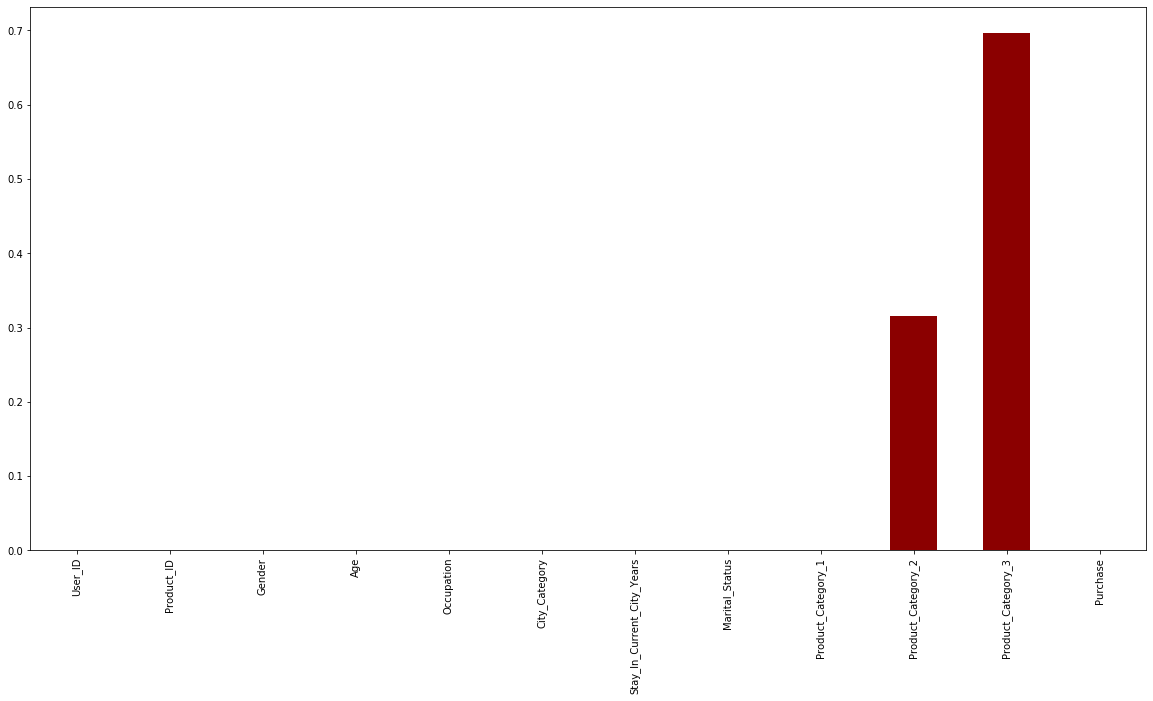

In [12]:
plt.figure(figsize = (20,10))
train.isna().mean().plot(kind ='bar', color = 'darkred')

The column 'Product_Category_3' has almost 70% missing values. Therefore, we will drop this column.
The column 'Product_Category_2' has around 30% missing values, which can be imputed.

In [37]:
def value_count(df):
    for i in list(df.columns):
        print("Column: {} Values: \n{} ".format(i, round((df[i].value_counts(normalize = True).mul(100)),2)))
        print("\n")

In [38]:
value_count(train)

Column: User_ID Values: 
1001680    0.19
1004277    0.18
1001941    0.16
1001181    0.16
1000889    0.15
           ... 
1000094    0.00
1002111    0.00
1004991    0.00
1005608    0.00
1000708    0.00
Name: User_ID, Length: 5891, dtype: float64 


Column: Product_ID Values: 
P00265242    0.34
P00025442    0.29
P00110742    0.29
P00112142    0.28
P00057642    0.27
             ... 
P00066342    0.00
P00070142    0.00
P00160742    0.00
P00315242    0.00
P00185942    0.00
Name: Product_ID, Length: 3631, dtype: float64 


Column: Gender Values: 
M    75.31
F    24.69
Name: Gender, dtype: float64 


Column: Age Values: 
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64 


Column: Occupation Values: 
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40

The columns 'Age' and 'Stay_In_Current_City_Years' contains values with + sign which needs to be replaced

### Distribution of target variable : Purchase

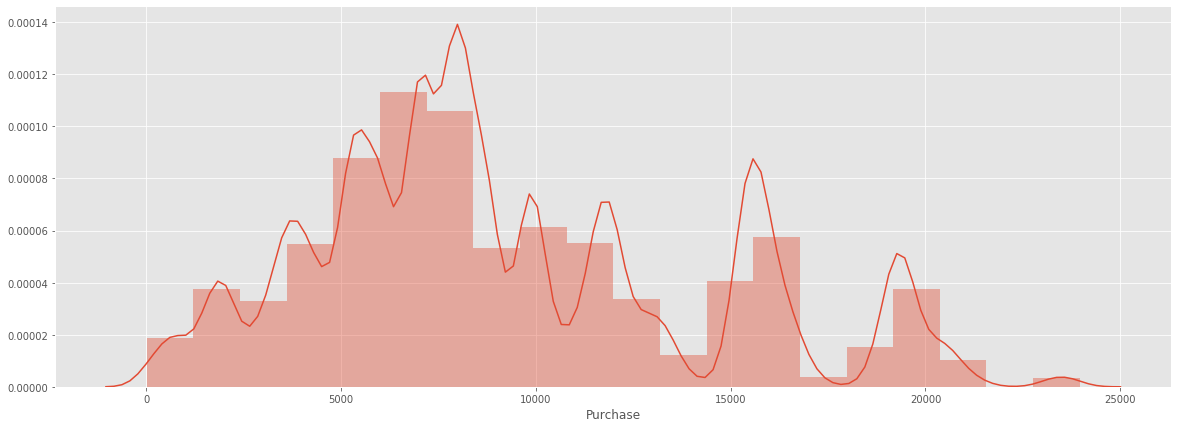

In [41]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)

### Distribution of 'Gender'

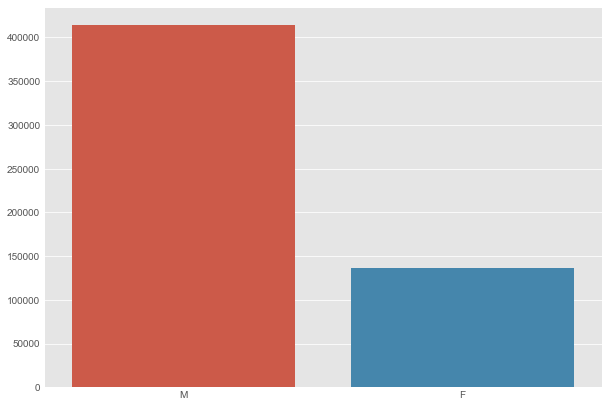

In [45]:
vals = train['Gender'].value_counts()

plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
sns.barplot(vals.index, vals.values)

### Distribution of 'City Category'

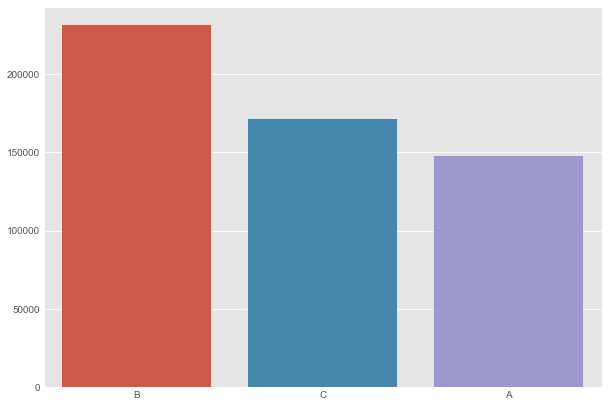

In [46]:
city_vals = train['City_Category'].value_counts()

plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
sns.barplot(city_vals.index, city_vals.values)

### Distribution of Age

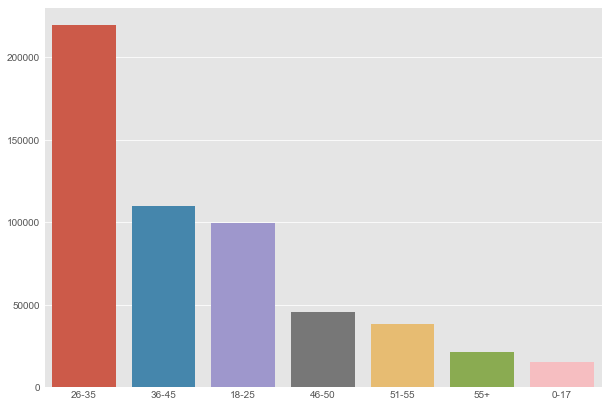

In [47]:
age_vals = train['Age'].value_counts()

plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
sns.barplot(age_vals.index, age_vals.values)

### Distribution of Occupation

Text(0.5, 0, 'Occupation code')

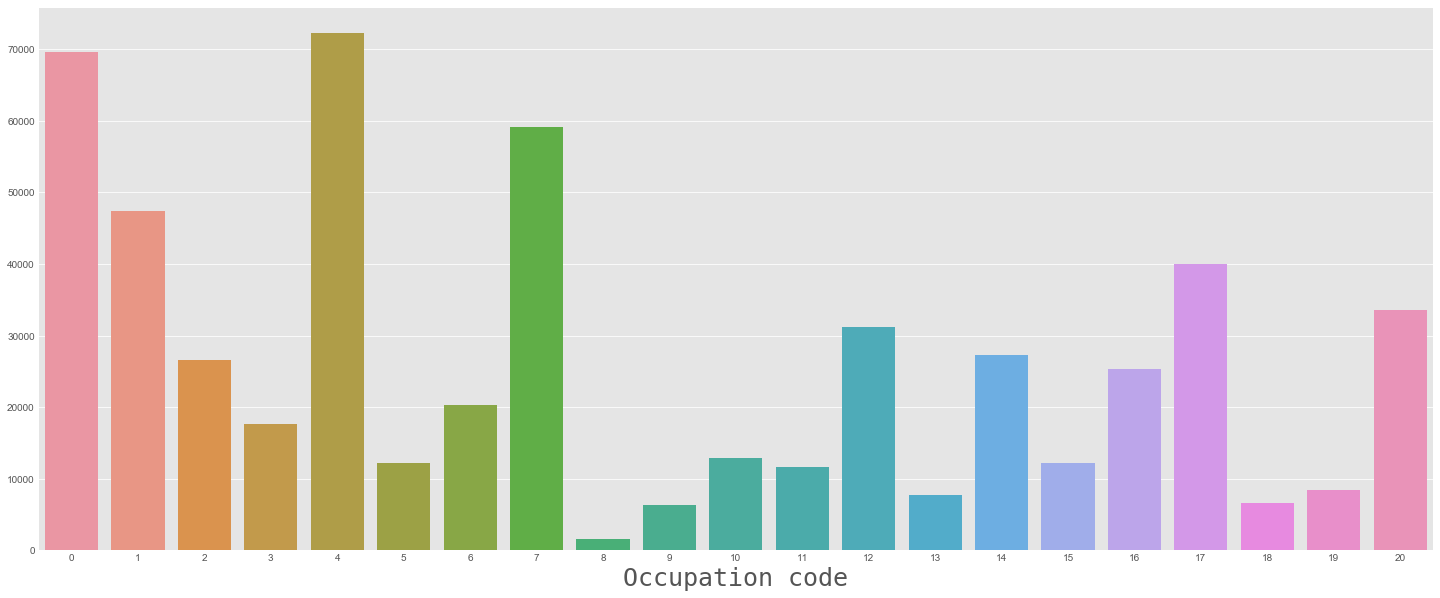

In [52]:
occ_vals = train['Occupation'].value_counts()

plt.figure(figsize = (25, 10))
plt.style.use('ggplot')
sns.barplot(occ_vals.index, occ_vals.values)

### Marital Status Distribution

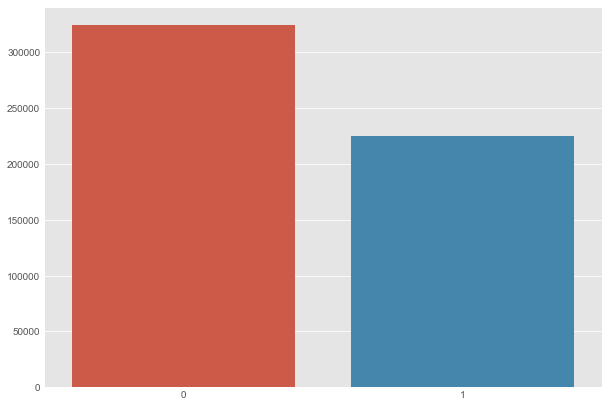

In [54]:
mar_vals = train['Marital_Status'].value_counts()

plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
sns.barplot(mar_vals.index, mar_vals.values)

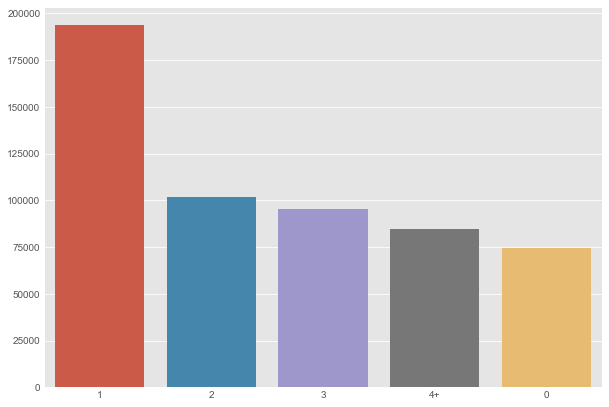

In [55]:
stay_vals = train['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
sns.barplot(stay_vals.index, stay_vals.values)

## Bivariate Analysis

### Gender wise purchase pattern

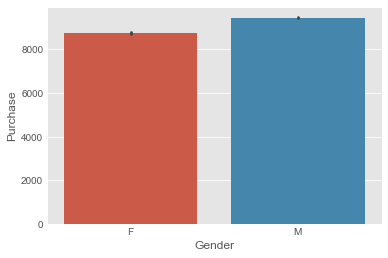

In [56]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 7))
sns.barplot(train['Gender'], train['Purchase'])

### City_Category wise purchase pattern

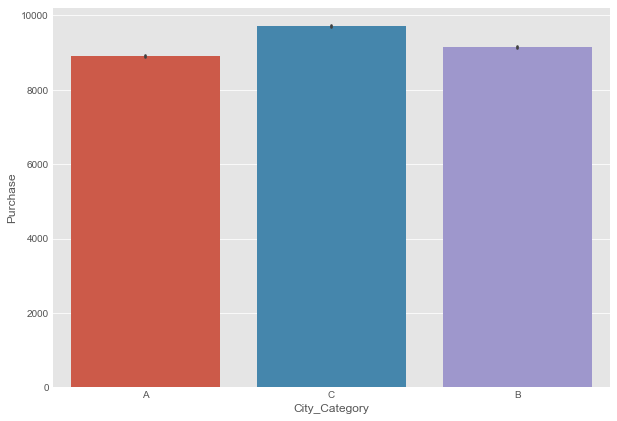

In [58]:
#plt.style.use('ggplot')
plt.figure(figsize = (10, 7))
sns.barplot(train['City_Category'], train['Purchase'])

### Age wise purchasing pattern

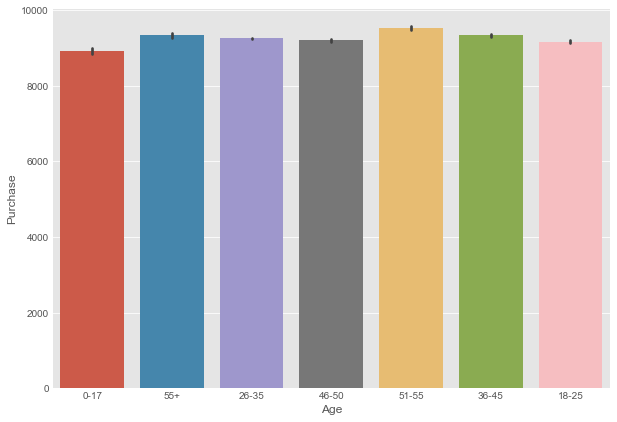

In [59]:
plt.figure(figsize = (10, 7))
sns.barplot(train['Age'], train['Purchase'])

### Occupation wise Purchasing Pattern

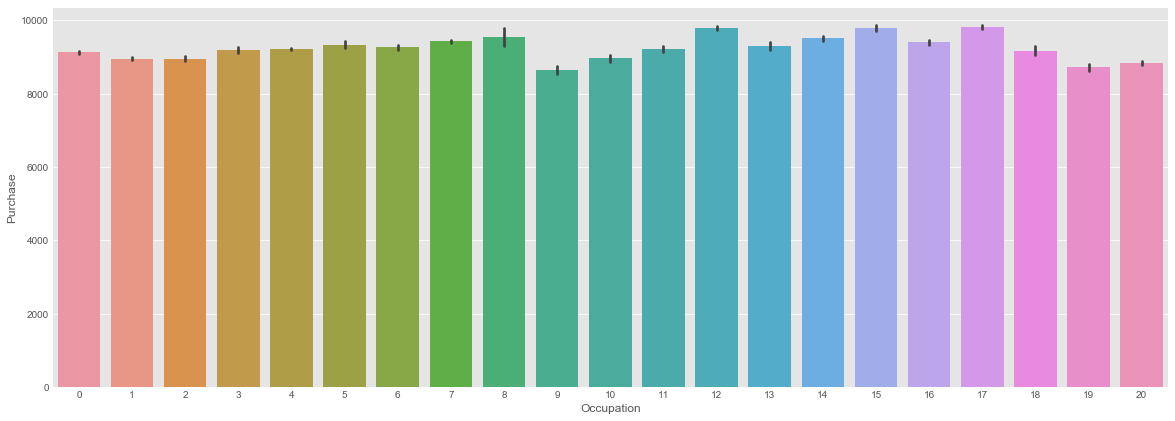

In [61]:
plt.figure(figsize = (20, 7))
sns.barplot(train['Occupation'], train['Purchase'])

### Marital Status wise Purchasing pattern

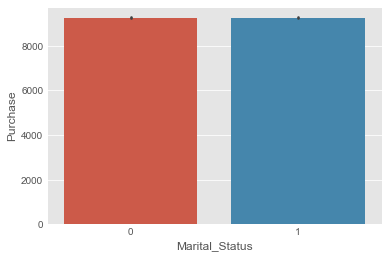

In [63]:
#plt.figure(figsize = (20, 7))
sns.barplot(train['Marital_Status'], train['Purchase'])

### Purchasing Pattern for Product_Category_1

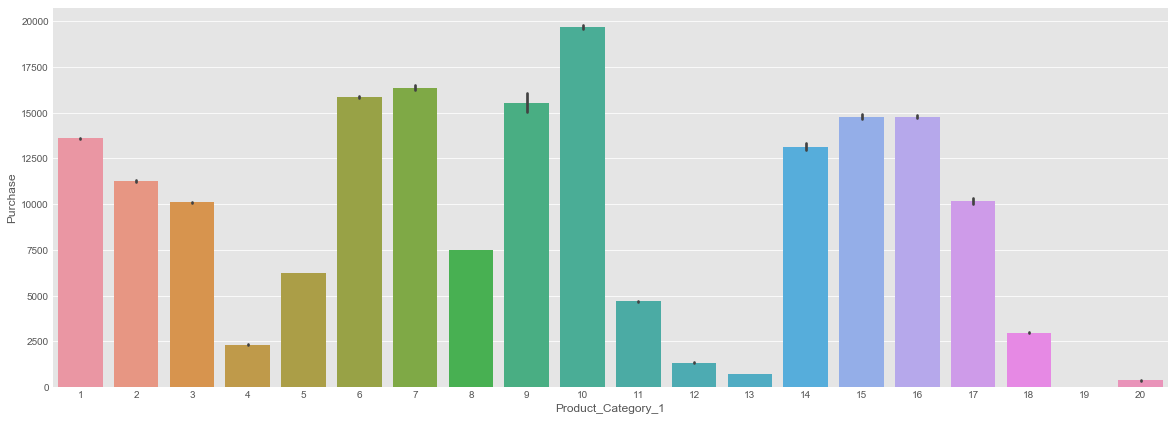

In [64]:
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'])

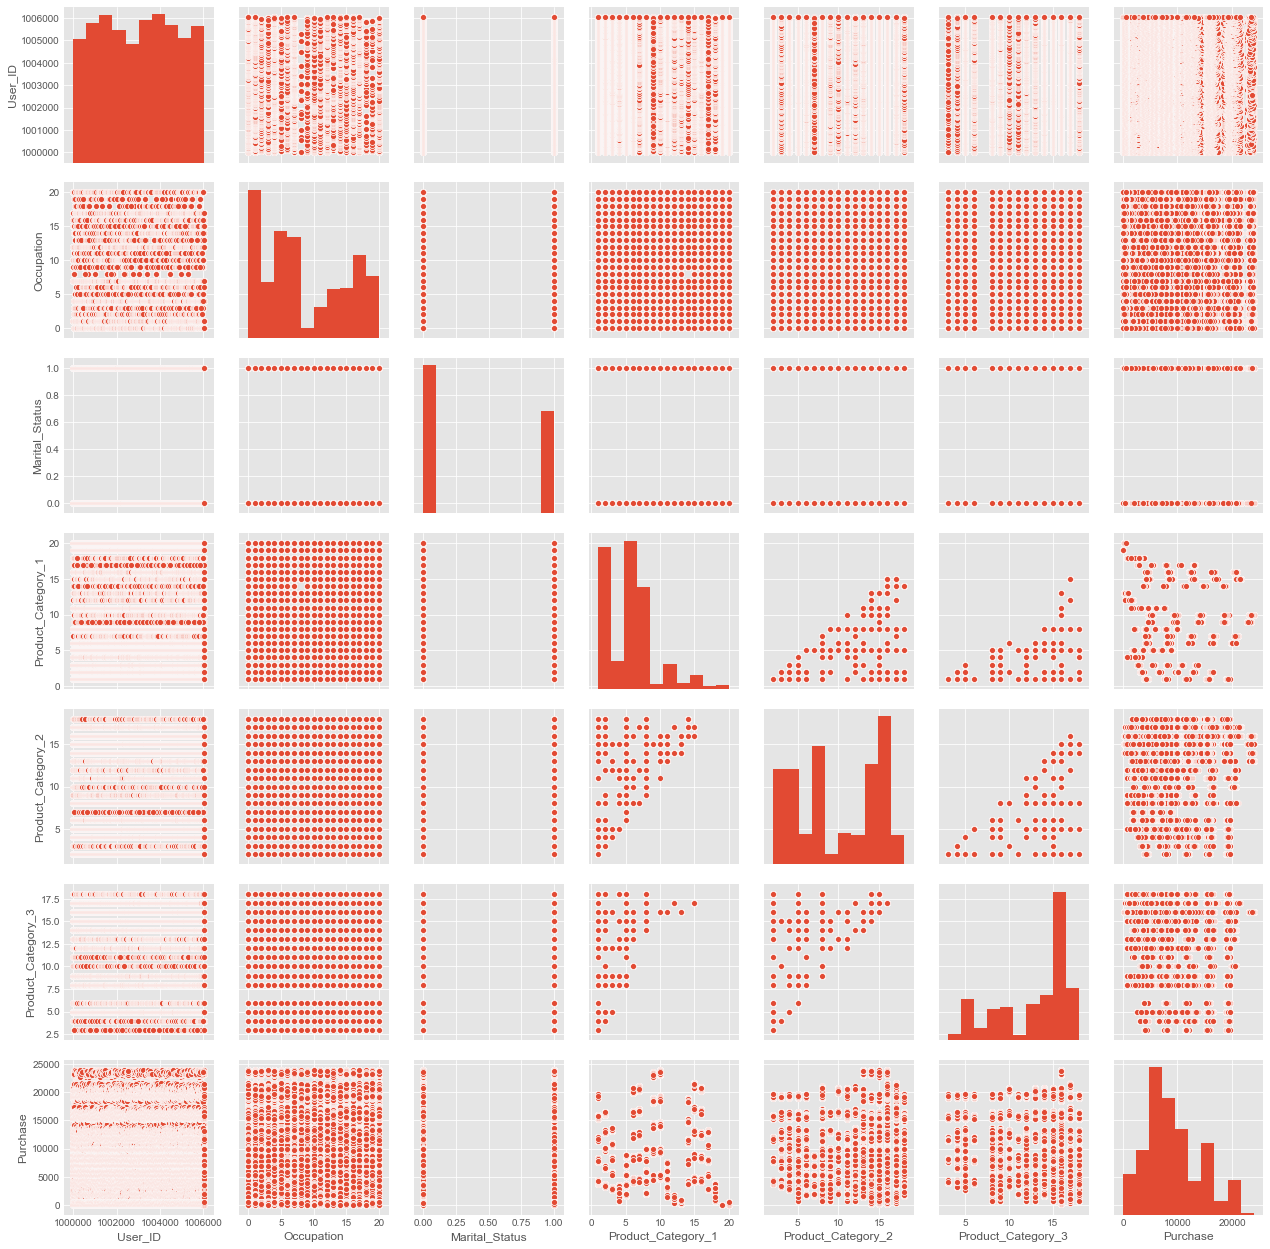

In [65]:
sns.pairplot(train)
plt.show()

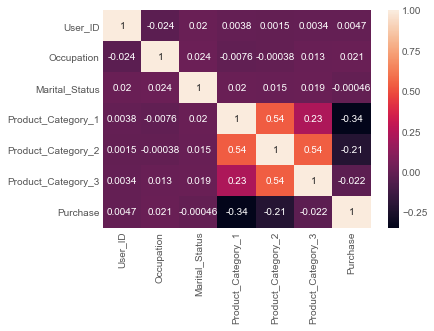

In [67]:
ax = sns.heatmap(train.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

From the correlation plot, we see that Product_Category_1 and Product_Category_2 are highly correlated with the target variable Purchase. The variable Product_Category_3 is not much correlated, hence it would be safe to drop it.

## Merging train and test dataset for pre-processing

In [68]:
train['source'] = 'train'
test['source'] = 'test'

In [69]:
dataset = pd.concat([train,test])

In [70]:
dataset['Age'] = dataset['Age'].apply(lambda x: str(x).replace('55+','55'))

In [71]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [72]:
drop_cols = ['User_ID','Product_ID','Product_Category_3']

In [73]:
dataset = dataset.drop(drop_cols, axis = 1)

In [74]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,NaN,7969.0,train


In [76]:
encode_cols = ['Gender','Age','City_Category']

In [78]:
for i in encode_cols:
    dataset[i] = LabelEncoder().fit_transform(dataset[i])

In [81]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,0,0,10,0,2,0,3,9.0,8370.0,train
1,0,0,10,0,2,0,1,6.0,15200.0,train
2,0,0,10,0,2,0,12,9.0,1422.0,train
3,0,0,10,0,2,0,12,14.0,1057.0,train
4,1,6,16,2,4,0,8,9.0,7969.0,train


In [80]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

In [82]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

In [83]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [84]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [85]:
X = train.drop('Purchase', axis = 1)

In [86]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9.0
1,0,0,10,0,2,0,1,6.0
2,0,0,10,0,2,0,12,9.0
3,0,0,10,0,2,0,12,14.0
4,1,6,16,2,4,0,8,9.0


In [87]:
Y = train['Purchase']

### Feature Selection And Scaling

In [90]:
selector = ExtraTreesRegressor()
selector.fit(X, Y)

ExtraTreesRegressor()

In [91]:
selector.feature_importances_

array([0.00493963, 0.02098789, 0.04949391, 0.0074899 , 0.02557062,
       0.006206  , 0.79621978, 0.08909227])

In [92]:
X.drop(['Gender','City_Category','Marital_Status'], axis = 1, inplace = True)

In [93]:
scaler = StandardScaler()

In [94]:
for col in X.columns:
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

### Train-Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [97]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## 1) Linear Regression

In [98]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred_linear_reg = linear_reg.predict(X_test)

In [100]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_linear_reg)))
print("R2 score:", r2_score(y_test, y_pred_linear_reg))

RMSE: 4699.4738725770985
R2 score: 0.12103412745405773


## 2) KNN Regression

In [101]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
y_pred_knn = knn.predict(X_test)

In [103]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2 score:", r2_score(y_test, y_pred_knn))

RMSE: 3277.5735280929334
R2 score: 0.5724583579516003


## 3) Decision Tree Regression

In [104]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [105]:
y_pred_tree = tree.predict(X_test)

In [106]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R2 score:", r2_score(y_test, y_pred_tree))

RMSE: 3065.4627634823023
R2 score: 0.6260051478220958


## 4) Random Forest

In [107]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
y_pred_random = random.predict(X_test)

In [109]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_random)))
print("R2 score:", r2_score(y_test, y_pred_random))

RMSE: 3032.8728965445016
R2 score: 0.6339149832263624


## 5) XGBoost

In [110]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred_xgb = xgb.predict(X_test)

In [114]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 score:", r2_score(y_test, y_pred_xgb))

RMSE: 2981.49123822391
R2 score: 0.6462140276360457


## Hyperparameter Tuning

In [115]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [116]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [117]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [118]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, 
                            cv = 5, random_state = 42)

In [119]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [120]:
xgb_cv.best_score_

0.6514078197016093

In [121]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [122]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, 
                        learning_rate = 1.0, max_depth = 11, 
                        min_child_weight = 66, verbosity = 0, 
                        random_state = 42)

In [123]:
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=11,
             min_child_weight=66, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [124]:
y_pred_xgb_best = xgb_best.predict(X_test)

In [125]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb_best)))
print("R2 score:", r2_score(y_test, y_pred_xgb_best))

RMSE: 2985.8201673408057
R2 score: 0.6451859339047361
